In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.stats import norm

In [ ]:

df= pd.read_csv('ventas.csv')

df.columns=df.columns.str.lower()
print(df.head())

        fecha       importe
0  01/01/2022    $8,315.50 
1  02/01/2022   $13,678.50 
2  03/01/2022    $3,087.00 
3  04/01/2022    $4,272.00 
4  05/01/2022     $3,883.50


# Data Clean

In [ ]:
df['importe'] = df['importe'].str.replace(',', '')
df['importe'] = df['importe'].str.replace('$', '')
df['importe'] = pd.to_numeric(df['importe'])
df['fecha'] = pd.to_datetime(df['fecha'], format='%d/%m/%Y').dt.strftime('%Y-%m-%d')
#Convert to date-time  object
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y-%m-%d')
df.dropna(inplace=True)
print(df.head())


       fecha  importe
0 2022-01-01   8315.5
1 2022-01-02  13678.5
2 2022-01-03   3087.0
3 2022-01-04   4272.0
4 2022-01-05   3883.5
/tmp/ipykernel_475/2388678089.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['importe'] = df['importe'].str.replace('$', '')


#  Graph by month

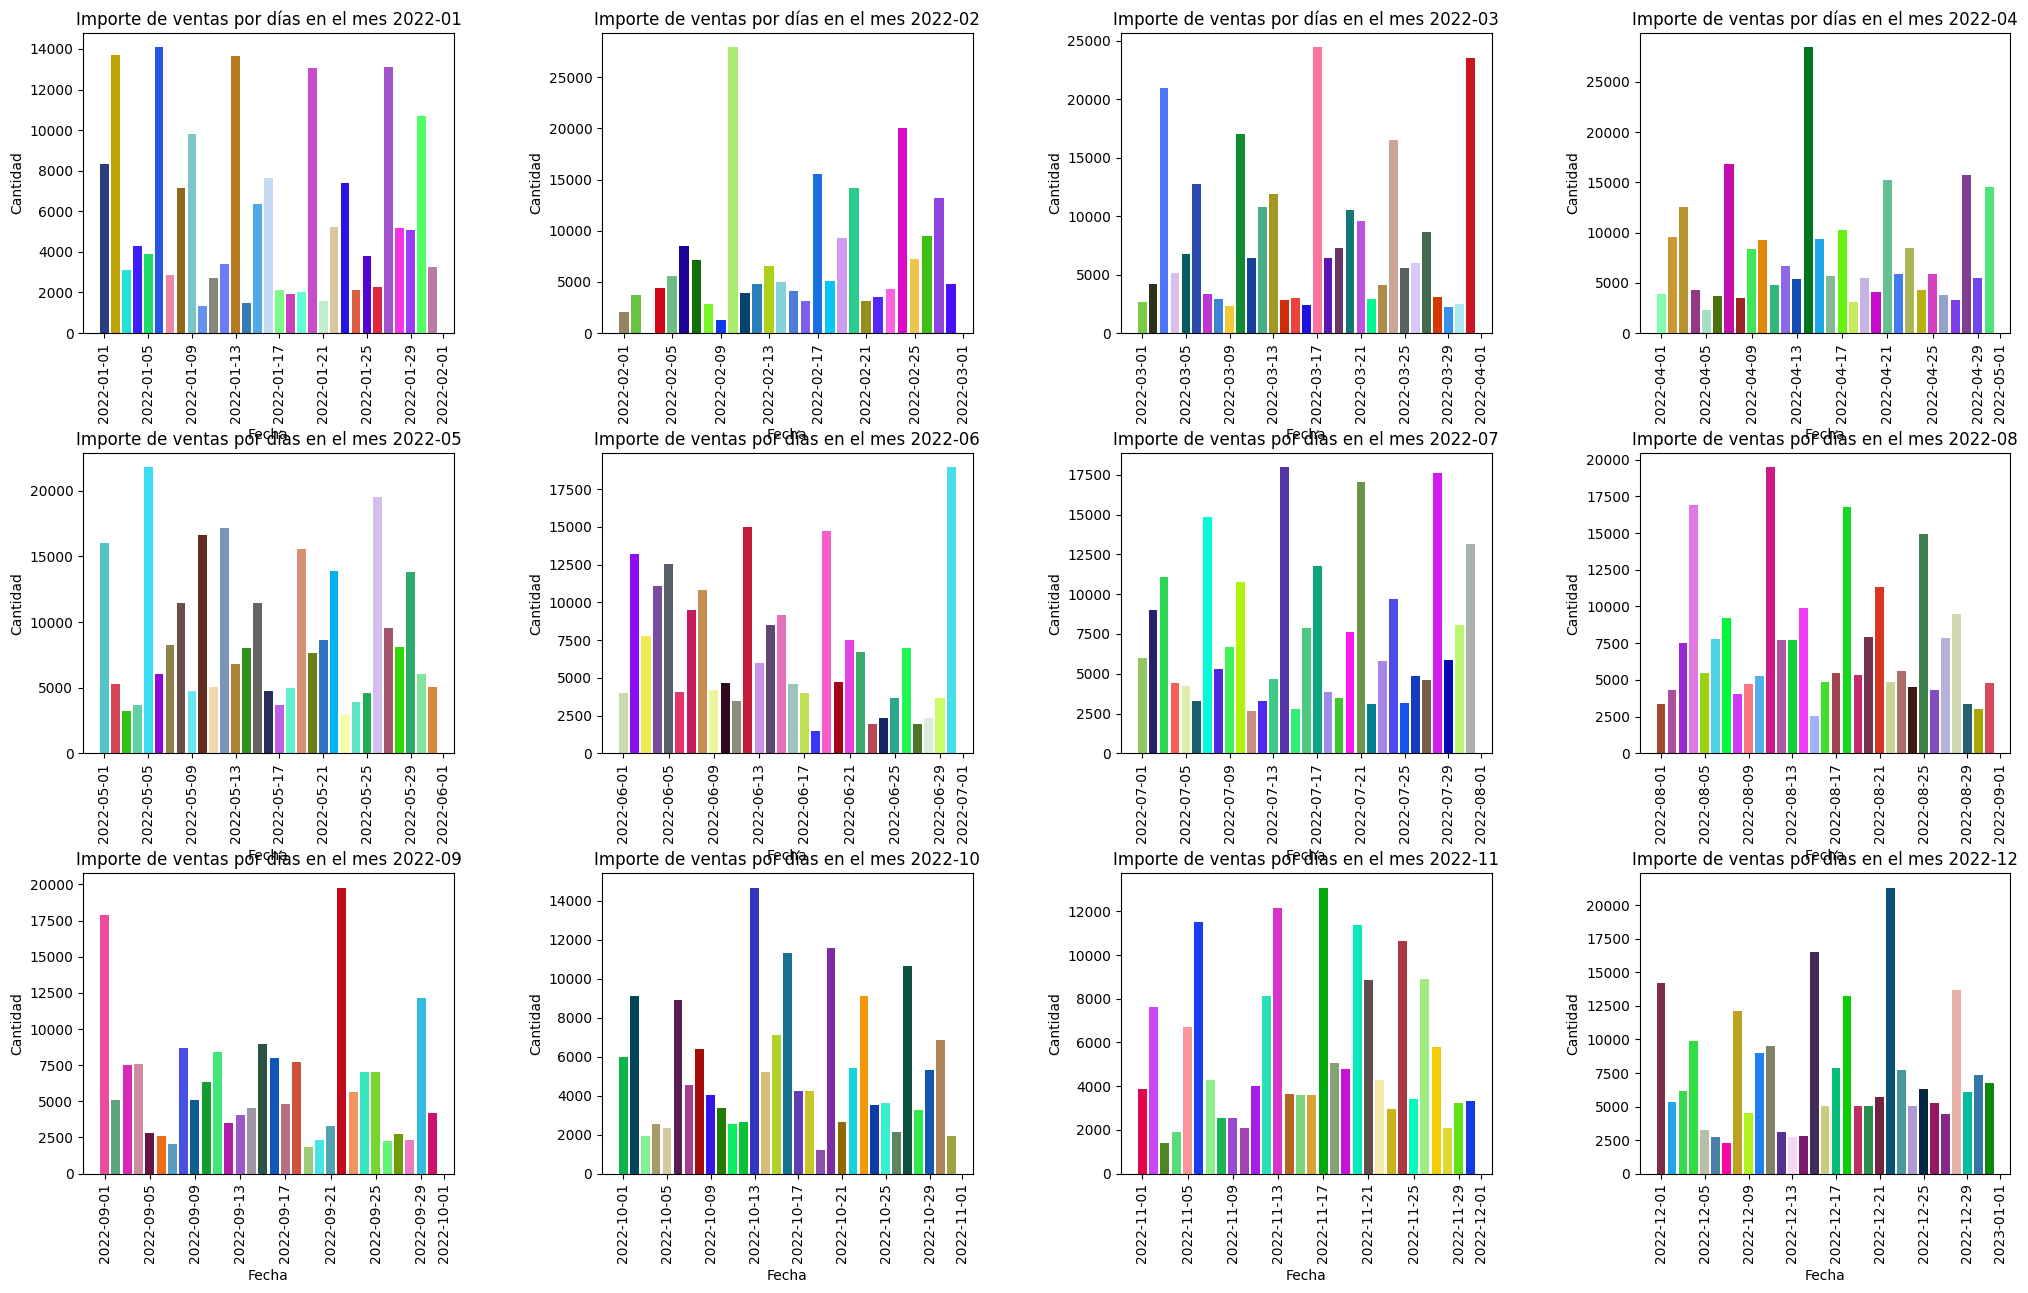

In [ ]:
import random
import matplotlib.pyplot as plt

df['mes'] = df['fecha'].dt.to_period('M')
datos_agrupados = df.groupby(['mes', 'fecha'])['importe'].sum().reset_index()
#print(datos_agrupados)

def color_aleatorio():
    return (random.random(), random.random(), random.random())

num_filas = 3
num_columnas = 4

fig, axs = plt.subplots(num_filas, num_columnas, figsize=(20, 12))
fig.tight_layout()

# Ajustar el espacio entre filas y columnas
plt.subplots_adjust(hspace=0.4, wspace=0.4)

meses_unicos = datos_agrupados['mes'].unique()

for i in range(num_filas):
    for j in range(num_columnas):
        index = i * num_columnas + j
        if index < len(meses_unicos):
            mes = meses_unicos[index]
            datos_mes = datos_agrupados[datos_agrupados['mes'] == mes]

            colores_barras = [color_aleatorio() for _ in range(len(datos_mes))]

            axs[i, j].bar(datos_mes['fecha'], datos_mes['importe'], color=colores_barras)
            axs[i, j].set_title(f'Importe de ventas por días en el mes {mes}')
            axs[i, j].set_xlabel('Fecha')
            axs[i, j].set_ylabel('Cantidad')
            axs[i, j].tick_params(axis='x', rotation=90)

plt.show()


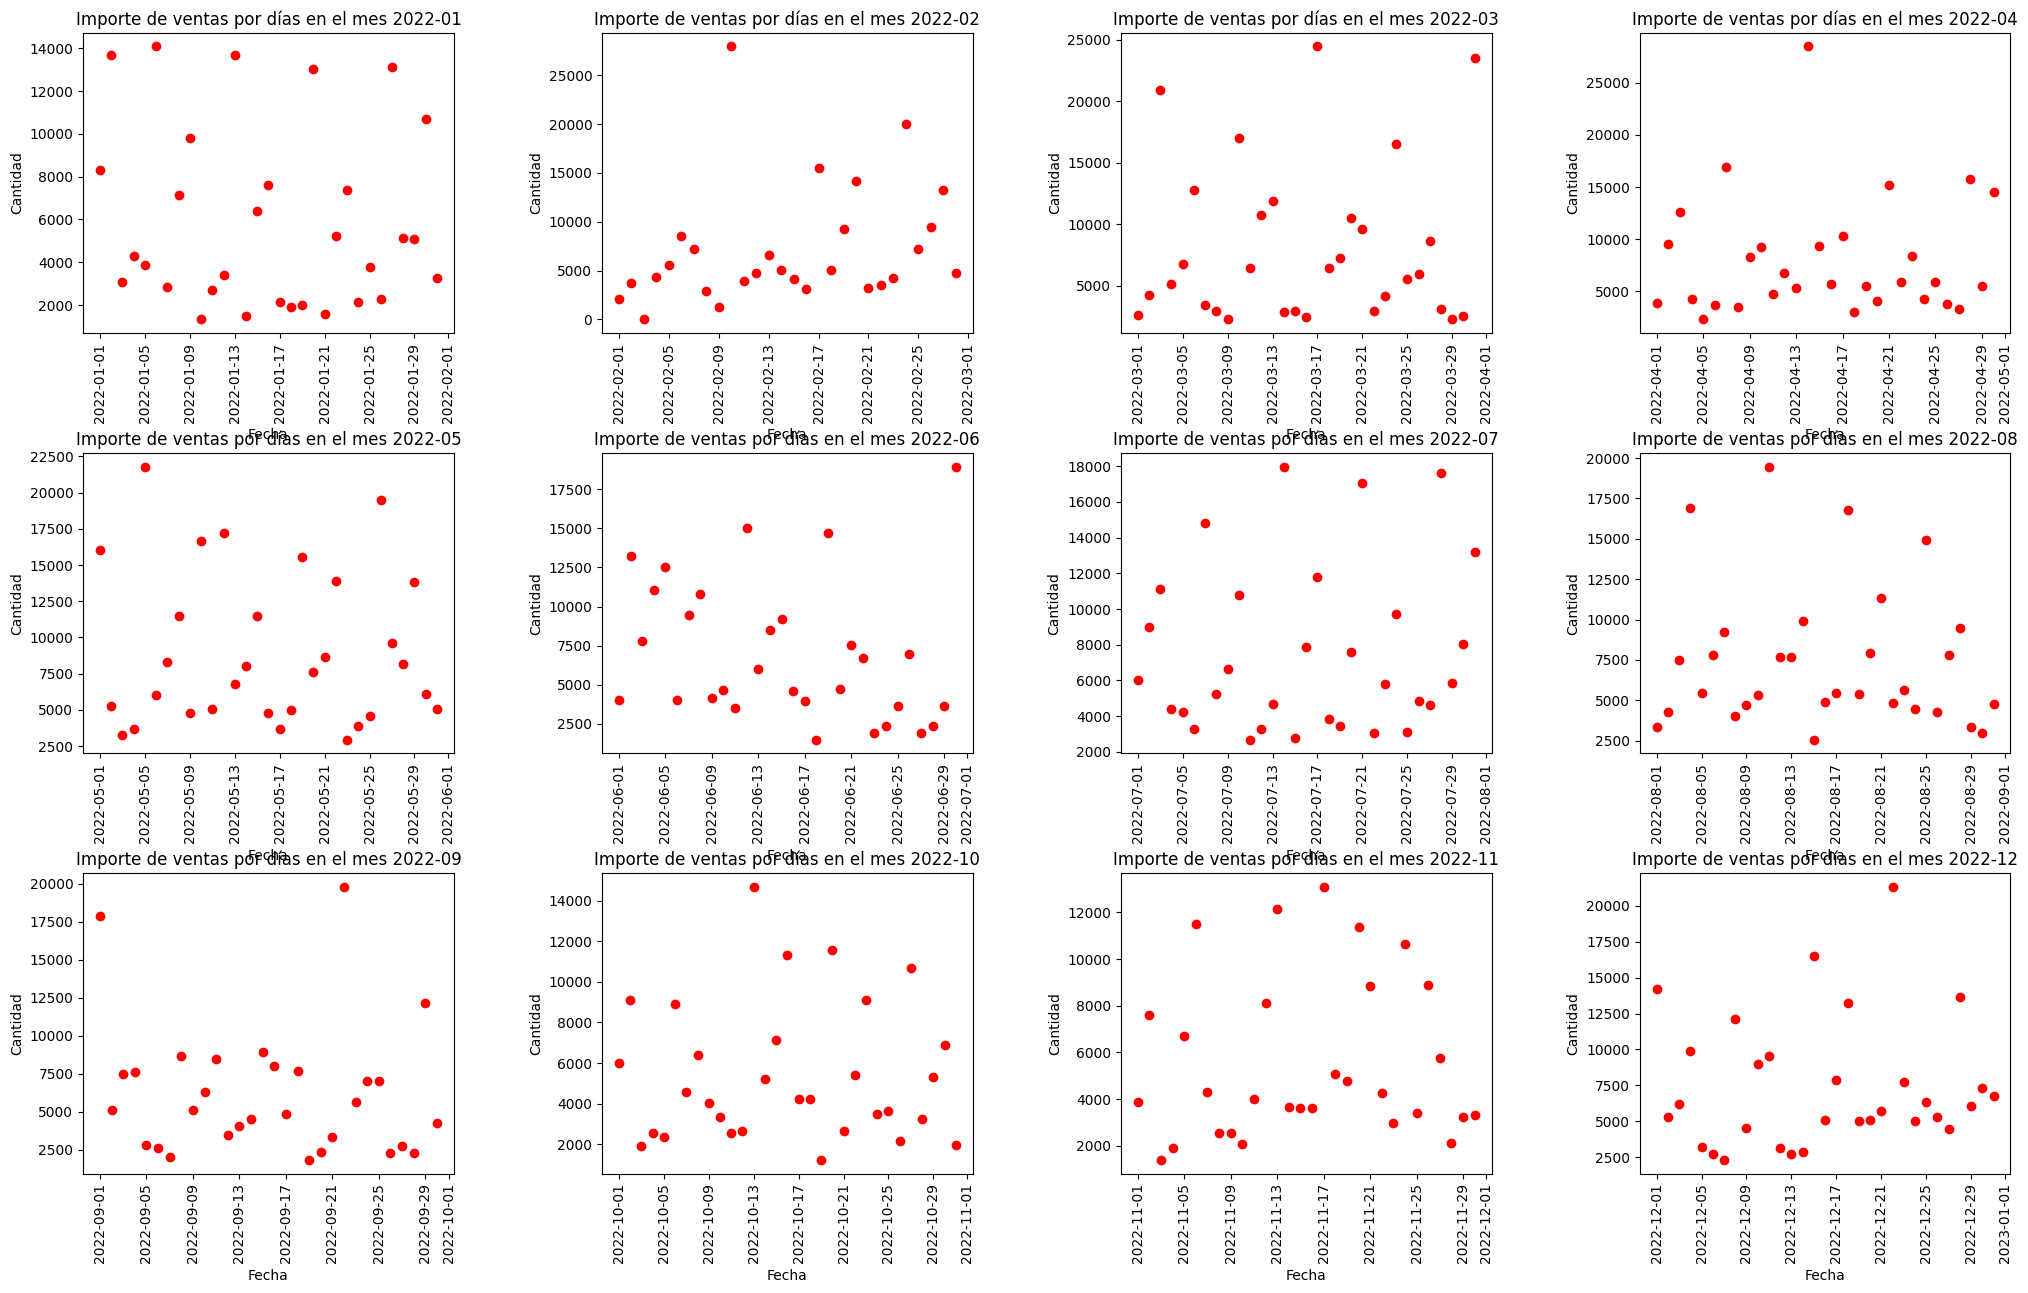

In [ ]:
num_filas = 3
num_columnas = 4

fig, axs = plt.subplots(num_filas, num_columnas, figsize=(20, 12))
fig.tight_layout()

# Ajustar el espacio entre filas y columnas
plt.subplots_adjust(hspace=0.4, wspace=0.4)

meses_unicos = datos_agrupados['mes'].unique()

for i in range(num_filas):
    for j in range(num_columnas):
        index = i * num_columnas + j
        if index < len(meses_unicos):
            mes = meses_unicos[index]
            datos_mes = datos_agrupados[datos_agrupados['mes'] == mes]

            # Crear un diagrama de dispersión para cada mes de venta
            axs[i, j].scatter(datos_mes['fecha'], datos_mes['importe'], c='red', marker='o', zorder=2)
            
            axs[i, j].set_title(f'Importe de ventas por días en el mes {mes}')
            axs[i, j].set_xlabel('Fecha')
            axs[i, j].set_ylabel('Cantidad')
            axs[i, j].tick_params(axis='x', rotation=90)
        else:
            axs[i, j].axis('off')  # Ocultar ejes de gráficos vacíos

plt.show()

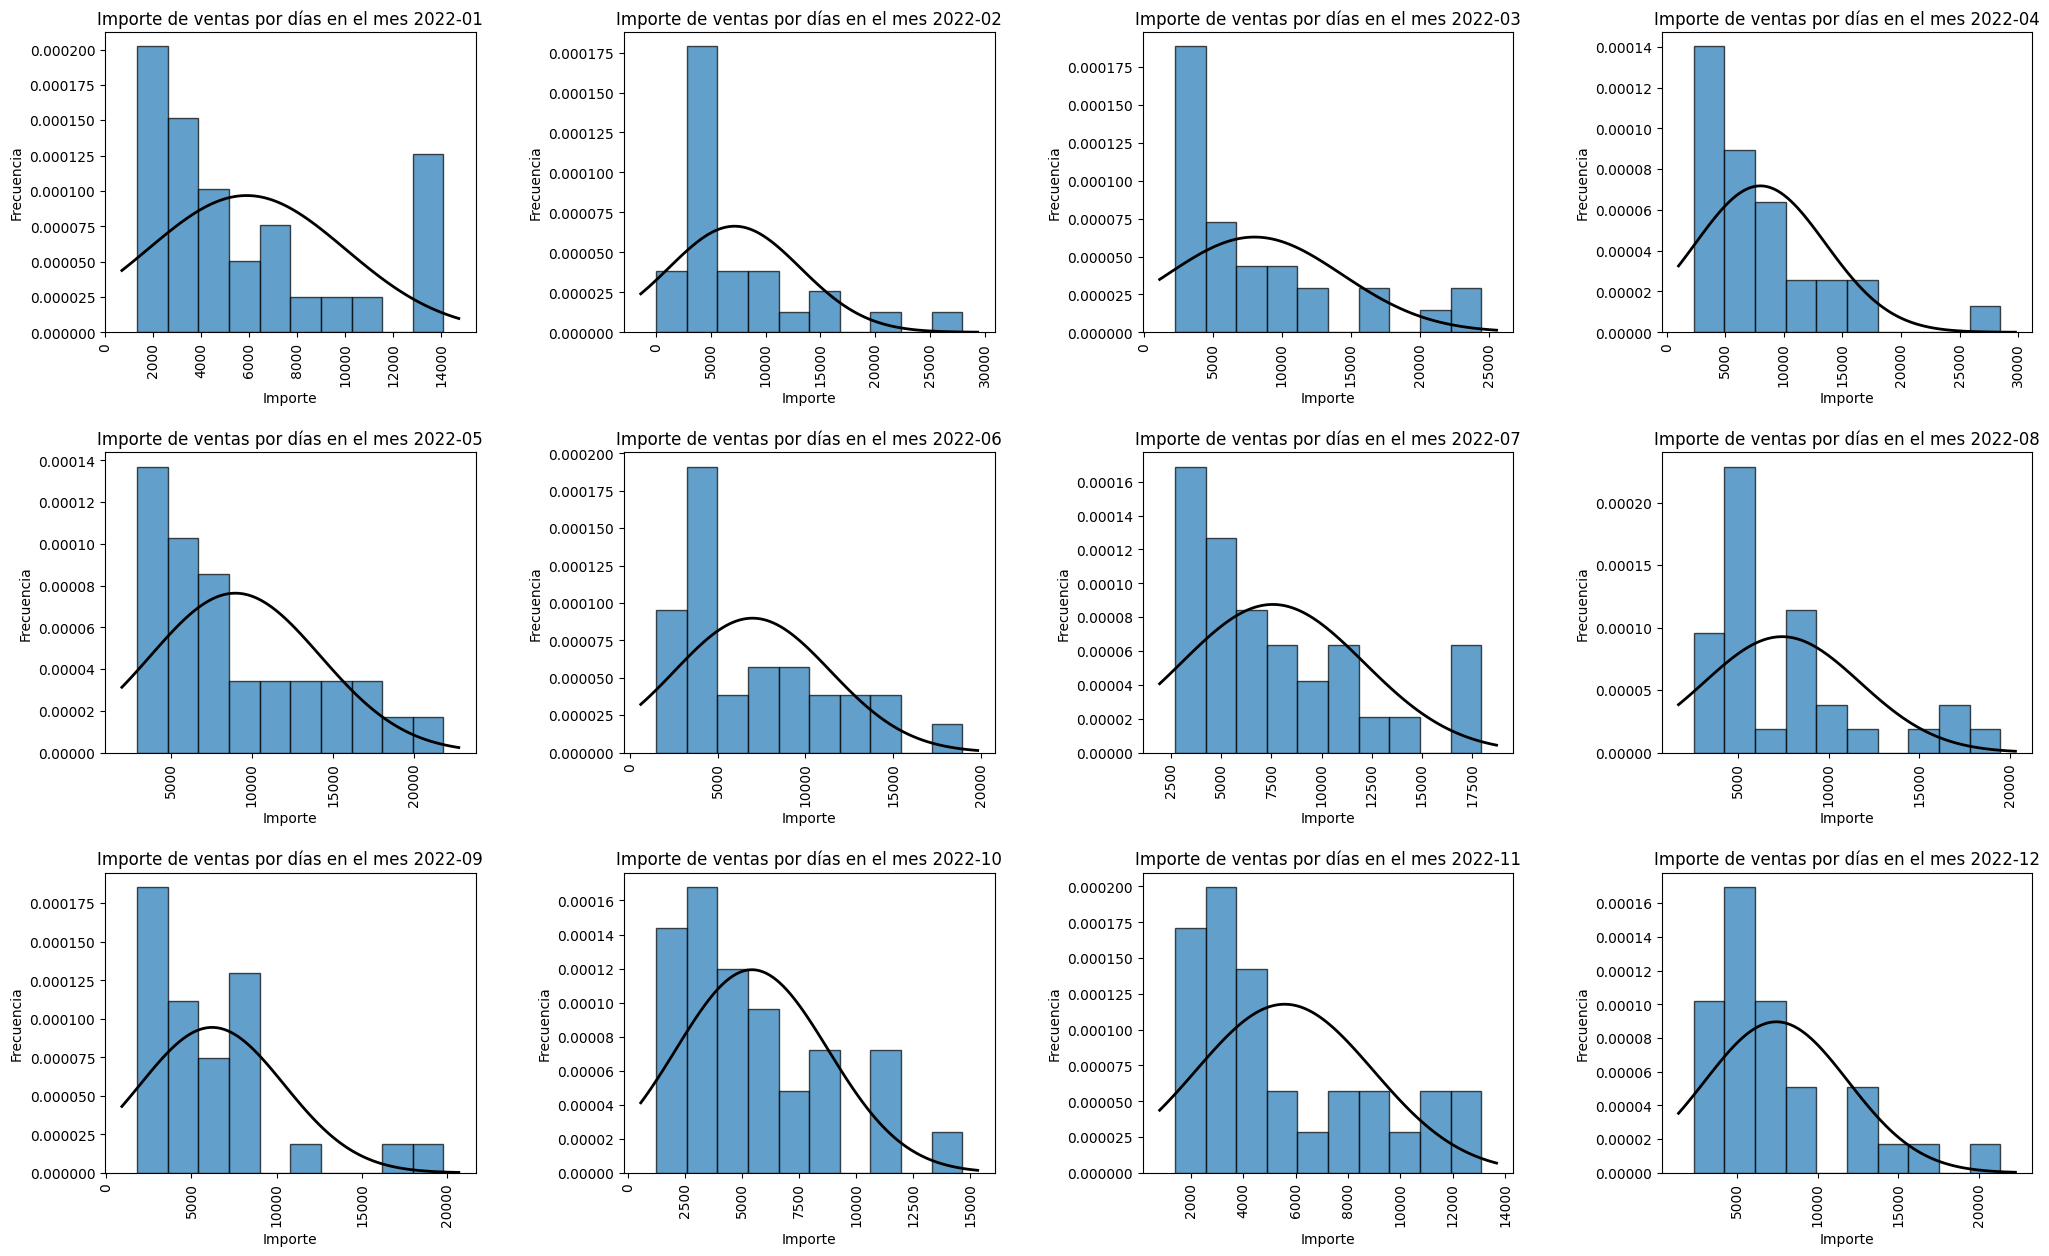

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

num_filas = 3
num_columnas = 4

fig, axs = plt.subplots(num_filas, num_columnas, figsize=(20, 12))
fig.tight_layout()

# Ajustar el espacio entre filas y columnas
plt.subplots_adjust(hspace=0.4, wspace=0.4)

meses_unicos = datos_agrupados['mes'].unique()

for i in range(num_filas):
    for j in range(num_columnas):
        index = i * num_columnas + j
        if index < len(meses_unicos):
            mes = meses_unicos[index]
            datos_mes = datos_agrupados[datos_agrupados['mes'] == mes]

            # Crear un histograma para cada mes de venta
            axs[i, j].hist(datos_mes['importe'], bins=10, edgecolor='black', alpha=0.7, density=True)
            
            # Calcular y trazar la curva de densidad de probabilidad
            mu, std = norm.fit(datos_mes['importe'])
            xmin, xmax = axs[i, j].get_xlim()
            x = np.linspace(xmin, xmax, 100)
            p = norm.pdf(x, mu, std)
            axs[i, j].plot(x, p, 'k', linewidth=2)
            
            axs[i, j].set_title(f'Importe de ventas por días en el mes {mes}')
            axs[i, j].set_xlabel('Importe')
            axs[i, j].set_ylabel('Frecuencia')
            axs[i, j].tick_params(axis='x', rotation=90)
        else:
            axs[i, j].axis('off')  # Ocultar ejes de gráficos vacíos

plt.show()



In [ ]:
for mes in meses_unicos:
    datos_mes=datos_agrupados[datos_agrupados['mes']==mes]
    std_month=datos_mes['importe'].std(ddof=0)
    #print(f'La desviación estandard del mes {mes} es: {std_month}')

In [ ]:
for mes in meses_unicos:
    datos_mes=datos_agrupados[datos_agrupados['mes']==mes]
    mean_month=datos_mes['importe'].mean()
    #print(f'La media del mes {mes} es: {mean_month}')

In [ ]:

for mes in meses_unicos:
    datos_mes=datos_agrupados[datos_agrupados['mes']==mes]
    Q1=datos_mes['importe'].quantile(0.25)
    Q3=datos_mes['importe'].quantile(0.75)
    IQR = Q3 - Q1
    datos_mes_filtrados=datos_mes[(datos_mes['importe']>= Q1 -1.5 * IQR) & (datos_mes['importe']<=Q3+1.5*IQR)]
    mean_filtrado=datos_mes_filtrados['importe'].mean()
    #print(f'La media sin valores atipicos es: {mean_filtrado}')

In [ ]:
for mes in meses_unicos:
    datos_mes = datos_agrupados[datos_agrupados['mes'] == mes]
    
    mean_month = datos_mes['importe'].mean()
    
    Q1 = datos_mes['importe'].quantile(0.25)
    Q3 = datos_mes['importe'].quantile(0.75)
    IQR = Q3 - Q1

    datos_mes_filtrados = datos_mes[(datos_mes['importe'] >= Q1 - 1.5 * IQR) & (datos_mes['importe'] <= Q3 + 1.5 * IQR)]
    mean_filtrado = datos_mes_filtrados['importe'].mean()
    
    diferencia = mean_month - mean_filtrado
    porcentaje_diferencia = (diferencia / mean_month) * 100
    
    #print(f'La diferencia en porcentaje entre la media original y la media filtrada del mes {mes} es: {porcentaje_diferencia:.2f}%')


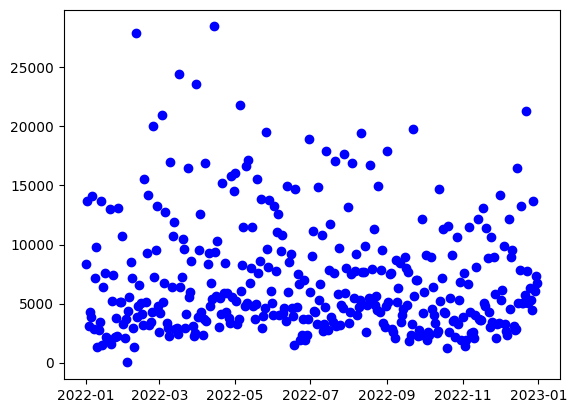

In [ ]:
plt.scatter(df['fecha'], df['importe'], c='blue', marker='o', zorder=2)

# Multiple Linear Regression 

### Dummy Variables

In [ ]:
#Dataframe con nombre del dia de la fecha

df_day=pd.DataFrame(df['fecha'])
df_day['importe']=df['importe']
df_day['dia']=df_day['fecha'].dt.day_name()

dummy_days=pd.get_dummies(df_day['dia'])
ordered_days=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

dummy_days = dummy_days[ordered_days]
df_day.drop('dia',axis=1,inplace=True)

df_day=pd.concat([df_day,dummy_days],axis=1)

df_day

,fecha,importe,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,2022-01-01,8315.5,0,0,0,0,0,1,0
1,2022-01-02,13678.5,0,0,0,0,0,0,1
2,2022-01-03,3087.0,1,0,0,0,0,0,0
3,2022-01-04,4272.0,0,1,0,0,0,0,0
4,2022-01-05,3883.5,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
360,2022-12-27,4479.0,0,1,0,0,0,0,0
361,2022-12-28,13662.0,0,0,1,0,0,0,0
362,2022-12-29,6050.0,0,0,0,1,0,0,0
363,2022-12-30,7314.0,0,0,0,0,1,0,0


In [ ]:
df_day['mes'] = df_day['fecha'].dt.month
df_enero = df_day[df_day['mes'] == 1].drop('mes', axis=1)
#print(df_enero)


In [ ]:
df_enero['importe'].mean()

5890.919354838709

In [ ]:

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

#variable X and Y
X = df_enero[ordered_days]
y = df_enero['importe']

#scale data
scaler = StandardScaler()
#X = scaler.fit_transform(X)
#y = scaler.fit_transform(y.to_numpy().reshape(-1,1))

#Creating Lasso regression model
valor_alpha = 1.0  # Puedes ajustar este valor para cambiar la regularización
model = Lasso(alpha=valor_alpha)
model.fit(X, y)

#Make predictions and calculate evaluations metrics
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Coefficients:", model.coef_)
print("Interception:", model.intercept_)
print("MSE:", mse)
print("R^2:", r2)


Coefficients: [-2003.4167039  -1215.14000074 -1488.96329757  9079.46340559
 -1625.48489125  2036.4672377   5442.64436666]
Interception: 4394.85563334126
MSE: 1659097.740990962
R^2: 0.9024940652316129
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.536e+05, tolerance: 5.275e+04
  model = cd_fast.enet_coordinate_descent(


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


#variable X and Y
X=df_enero[ordered_days]
y=df_enero['importe']

#scale data
scaler=StandardScaler()
X=scaler.fit_transform(X)
y=scaler.fit_transform(y.to_numpy().reshape(-1,1))

#Creating multiple linear regression model
model=LinearRegression()
model.fit(X,y)

#Make predictions and calculate evaluations metrics
y_pred=model.predict(X)
mse=mean_squared_error(y,y_pred)
r2 = r2_score(y, y_pred)

print("Coefficients:", model.coef_)
print("Interception:", model.intercept_)
print("MSE:", mse)
print("R^2:", r2)

Coefficients: [[-0.3118654  -0.22034185 -0.24261996  0.61751018 -0.2537641   0.04931119
   0.35298593]]
Interception: [1.13920912e-16]
MSE: 0.09750343966247159
R^2: 0.9024965603375283


February,June, November and december have a low R^2 is necesarry do it change 

In the data it can be seen that the days Thursaday and Sunday are day with a lot of sale, but more Thursday

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

def monthly_regression(df_month):
    ordered_days=[ 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    
    X = df_month[ordered_days]
    y = df_month['importe']

    scaler = StandardScaler()
    #X = scaler.fit_transform(X)
    #y = scaler.fit_transform(y.to_numpy().reshape(-1, 1))
    scaler_minMax = MinMaxScaler()

    y=scaler_minMax.fit_transform(y.to_numpy().reshape(-1,1))

    model = LinearRegression()
    model.fit(X, y)

    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    return {
        "Coefficients": model.coef_,
        "Interception": model.intercept_,
        "MSE": mse,
        "R^2": r2,
        "y": y,
        "y_pred": y_pred
    }

# Crear columna 'mes' en el dataframe df_day
df_day['mes'] = df_day['fecha'].dt.month

# Aplicar la regresión lineal múltiple por mes
results = {}

for month in range(1, 13):
    df_month = df_day[df_day['mes'] == month].drop('mes', axis=1)
    results[f"Month {month}"] = monthly_regression(df_month)

# Imprimir resultados
for month, result in results.items():
    print(month)
    print("Coefficients:", result["Coefficients"])
    print("Interception:", result["Interception"])
    print("MSE:", result["MSE"])
    print("R^2:", result["R^2"])
    print("\n")





Month 1
Coefficients: [[0.06162722 0.04014576 0.86951845 0.02940013 0.3174281  0.58431941]]
Interception: [0.08292454]
MSE: 0.010188058762931088
R^2: 0.9024965603375285


Month 2
Coefficients: [[-0.06784436 -0.06966467  0.38756619  0.00366816  0.08019141  0.1995975 ]]
Interception: [0.18021914]
MSE: 0.022648519377410144
R^2: 0.5104141891153677


Month 3
Coefficients: [[-0.08925513 -0.07257446  0.71015208  0.05279466  0.13382643  0.28009818]]
Interception: [0.11135512]
MSE: 0.007438907851855464
R^2: 0.9088462243175701


Month 4
Coefficients: [[ 0.00252354 -0.01466807  0.55761181  0.04321464  0.18349281  0.17619462]]
Interception: [0.08336759]
MSE: 0.011550720685675272
R^2: 0.7441258147511295


Month 5
Coefficients: [[ 0.09244913 -0.00979516  0.72916777  0.14525081  0.18587061  0.45447213]]
Interception: [0.09670997]
MSE: 0.016483364028060884
R^2: 0.7856625234222154


Month 6
Coefficients: [[0.15979489 0.15456417 0.25237455 0.0300014  0.04356544 0.46601408]]
Interception: [0.15366133]
MS

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=10656f0c-5560-4386-a8bd-10a3d72c1780' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>